## Generative Adversarial Networks

Training GAN on data distribution is a gaussian distribution using MLP and momentum optimizer

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import tensorflow as tf
from scipy.stats import norm

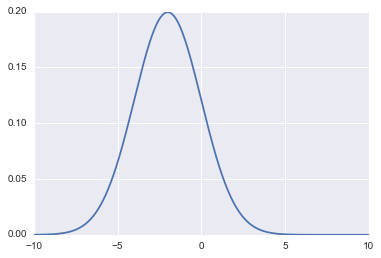

In [5]:
mu, sigma = -2, 2
xs = np.linspace(-10,10,4000)
plt.plot(xs, norm.pdf(xs,loc = mu, scale = sigma))

In [6]:
maxIter  = 1000
M = 200 # minibatch size

In [8]:
# Multi Layer Perceptron

def mlp(input_data, output_dim):
    
    """
    Multi Layer Perceptron that will be used for Generative and Discriminative model
    
    Args:
        input_data: Data or Activations coming into the network
        output_dim: dimension of the data going out of the network
    Output:
        fc3: Fully connected output
    """
    
    w1 = tf.get_variable("w0", [input_data.shape()[1], 6], initializer = tf.random_normal_initializer())
    b1 = tf.get_variable("b0", [6], initializer = tf.constant_initializer(0.0))
    w2 = tf.get_variable("w1", [6,5], initializer= tf.random_normal_initializer())
    b2 = tf.get_variable("b1", [5], initializer= tf.constant_initializer(0.0))
    w3 = tf.get_variable("w2", [5,output_dim], initializer= tf.random_normal_initializer())
    b3 = tf.get_variable("b2", [output_dim], initializer= tf.constant_initializer(0.0))
    
    fc1 = tf.nn.tanh(tf.matmul(input_data,w1) + b1)
    fc2 = tf.nn.tanh(tf.matmul(fc2,w2) + b2)
    fc3 = tf.nn.tanh(tf.matmul(fc3,w3) + b3)
    
    weights = [w1,b1,w2,b2,w3,b3]
    return fc3, weights

In [ ]:
def momentum_optimizer(loss, var_list):
    """
    Momentum optimizer
    
    Args:
        loss: loss function value
        var_list: list of variables involved in optimization process
    Output:
        optimizer: optimization function
    """
    batch = tf.Variable(0)
    learning_rate = tf.train.exponential_decay(0.001, batch, maxIter//4, 0.95, staircase = True) #learning rate decay
    
    